<a href="https://colab.research.google.com/github/ugnet/Faster-RCNN_PyTorch/blob/main/Faster_RCNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt

#uzsikrauti paveiksliukus



In [ ]:
# our module
class Net(nn.Module):
  def __init__(self):
    super.__init__()

In [ ]:
import torch
image = torch.zeros((1, 3, 800, 800)).float()
print(image)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


In [ ]:
model = torchvision.models.vgg16(pretrained=True)
fe = list(model.features)
print(fe) # length is 15



[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [ ]:
req_features = []
k = image.clone()
for i in fe:
    k = i(k)
    if k.size()[2] < 800//16:
        break
    req_features.append(i)
    out_channels = k.size()[1]
print(len(req_features)) #30
print(out_channels) # 512
print(req_features)

30
512
[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), paddin

In [ ]:
faster_rcnn_fe_extractor = nn.Sequential(*req_features)

In [ ]:
#function for getting vgg feature extractor
def get_vgg_fe_extractor():
  features=[]
  features.append(nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  #tolesniu vgg operaciju nevykdome

  fe_extractor = nn.Sequential(*features)
  return fe_extractor

vgg_feature_extractor = get_vgg_fe_extractor()
feature_map = vgg_feature_extractor(image)
print(feature_map.size())

torch.Size([1, 512, 50, 50])


In [ ]:
#function for vizualizing feature maps
def vizualize_feature_maps(feature_map, r):
  imgArray = feature_map.data.cpu().numpy().squeeze(0)
  fig=plt.figure(figsize=(12, 4))
  figNo=1
  for i in range(r):
    fig.add_subplot(1, r, figNo)
    plt.imshow(imgArray[i],  cmap='gray')
    figNo+=1
  plt.show()

torch.Size([1, 512, 50, 50])


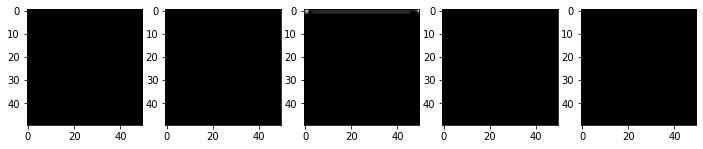

In [ ]:
# Now this faster_rcnn_fe_extractor can be used as our backend. Lets compute the features
feature_map = faster_rcnn_fe_extractor(image)
print(feature_map.size())

#Vizualize first 5 feature maps
vizualize_feature_maps(feature_map, 5)
#OUT MAP IS feature map

In [ ]:
fe_size=(800//16)
ctr_x = np.arange(16, (fe_size+1)*16, 16)
ctr_y = np.arange(16, (fe_size+1)*16, 16)
print(len(ctr_x), ctr_x)

50 [ 16  32  48  64  80  96 112 128 144 160 176 192 208 224 240 256 272 288
 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576
 592 608 624 640 656 672 688 704 720 736 752 768 784 800]


In [ ]:
index=0
ctr = np.zeros((2500, 2))
for x in range(len(ctr_x)):
  for y in range(len(ctr_y)):
    ctr[index, 1] = ctr_x[x]-8
    ctr[index, 0] = ctr_y[y]-8
    index +=1
print(ctr.shape)

(2500, 2)
